In [1]:
import pandas as pd

# Load the uploaded CSV file to inspect its structure and content
file_path = 'final_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,Day,P,T,Site,Discharge_cms,Area,Month,Year
0,0,2018-06-18,0.0067,9.3245,AboveWoodCamp,4.860850,402.836,6,2018
1,1,2018-06-19,0.1799,9.8528,AboveWoodCamp,4.687956,402.836,6,2018
2,2,2018-06-20,0.0000,11.3796,AboveWoodCamp,4.527820,402.836,6,2018
3,3,2018-06-21,0.0000,14.6775,AboveWoodCamp,4.296201,402.836,6,2018
4,4,2018-06-22,0.0000,12.2427,AboveWoodCamp,4.160555,402.836,6,2018


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the unnecessary index column
data = data.drop(columns=['Unnamed: 0'])

In [3]:
# Summary statistics
summary_stats = data.describe()
print (summary_stats)

                  P             T  Discharge_cms          Area         Month  \
count  20859.000000  20859.000000   20859.000000  20859.000000  20859.000000   
mean       2.567599      5.609972       4.618361    428.693327      6.605590   
std        5.842051      8.921494       5.960580    174.608724      3.281633   
min        0.000000    -19.692400       0.055181     66.480000      1.000000   
25%        0.000000     -1.524600       1.367528    276.760000      4.000000   
50%        0.000200      5.376400       2.560795    519.242000      7.000000   
75%        1.949300     13.479750       5.100723    559.860000      9.000000   
max       59.180400     23.608400      51.120554    564.682000     12.000000   

               Year  
count  20859.000000  
mean    2019.179779  
std        2.947912  
min     2014.000000  
25%     2017.000000  
50%     2019.000000  
75%     2022.000000  
max     2024.000000  


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Day              0
P                0
T                0
Site             0
Discharge_cms    0
Area             0
Month            0
Year             0
dtype: int64


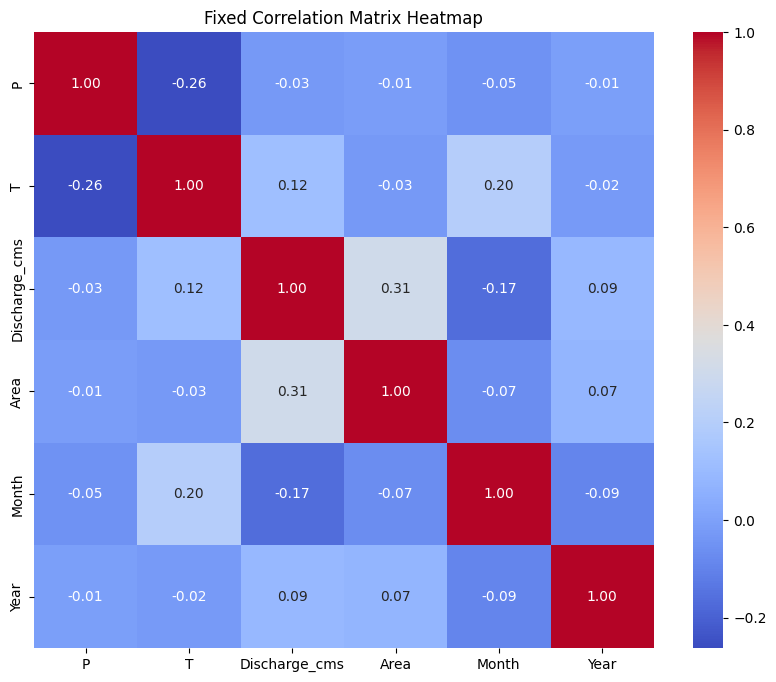

In [5]:
# Convert "Day" to datetime format for consistency, if needed
data['Day'] = pd.to_datetime(data['Day'])

# Select only numeric columns for correlation
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix_fixed = numeric_columns.corr()

# Plot the fixed correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_fixed, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Fixed Correlation Matrix Heatmap")
plt.show()


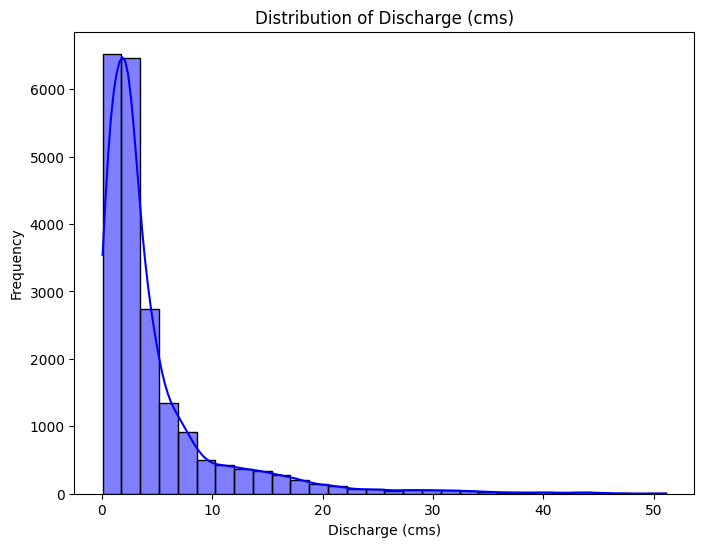

In [6]:
# Distribution plot for 'Discharge_cms'
plt.figure(figsize=(8, 6))
sns.histplot(data['Discharge_cms'], kde=True, bins=30, color='blue')
plt.title("Distribution of Discharge (cms)")
plt.xlabel("Discharge (cms)")
plt.ylabel("Frequency")
plt.show()


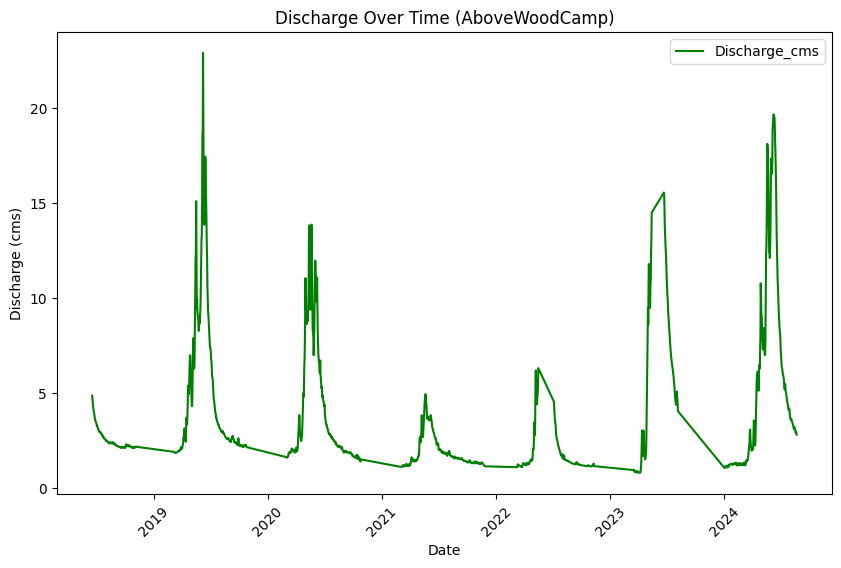

In [7]:
# Line plot for 'Discharge_cms' over time at a specific site
above_wood_camp = data[data['Site'] == 'AboveWoodCamp']
plt.figure(figsize=(10, 6))
plt.plot(above_wood_camp['Day'], above_wood_camp['Discharge_cms'], label='Discharge_cms', color='green')
plt.title("Discharge Over Time (AboveWoodCamp)")
plt.xlabel("Date")
plt.ylabel("Discharge (cms)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


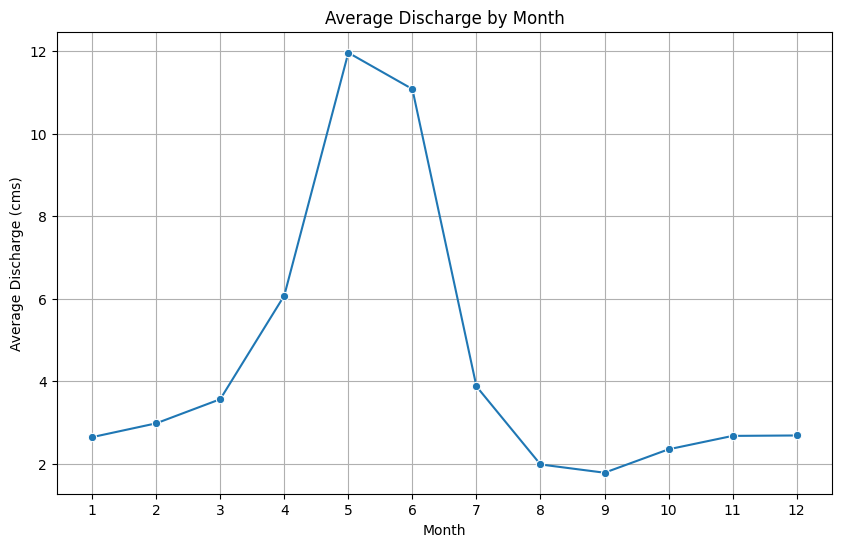

In [8]:
# Monthly trend of average discharge
monthly_trend = data.groupby('Month')['Discharge_cms'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Discharge_cms', data=monthly_trend, marker='o')
plt.title("Average Discharge by Month")
plt.xlabel("Month")
plt.ylabel("Average Discharge (cms)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


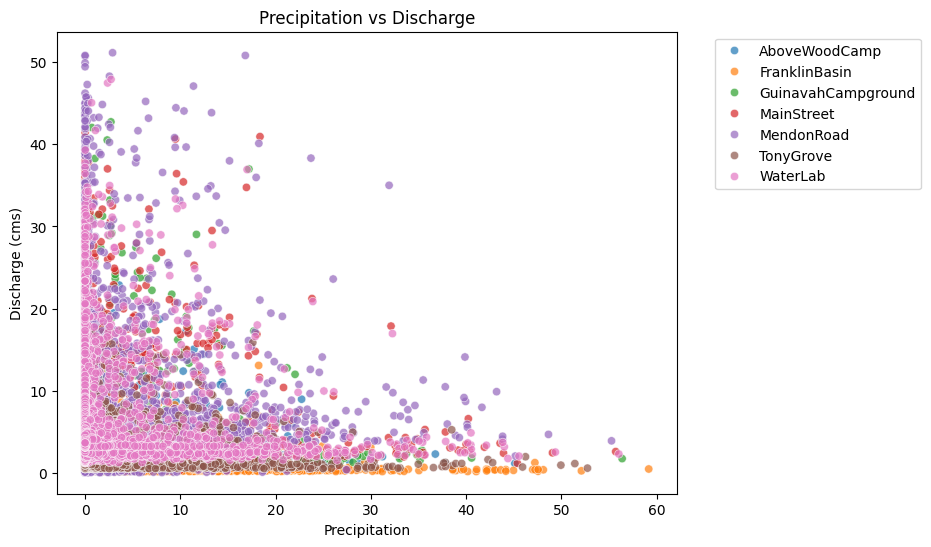

In [9]:
# Scatterplot of precipitation vs discharge
plt.figure(figsize=(8, 6))
sns.scatterplot(x='P', y='Discharge_cms', hue='Site', data=data, alpha=0.7)
plt.title("Precipitation vs Discharge")
plt.xlabel("Precipitation")
plt.ylabel("Discharge (cms)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


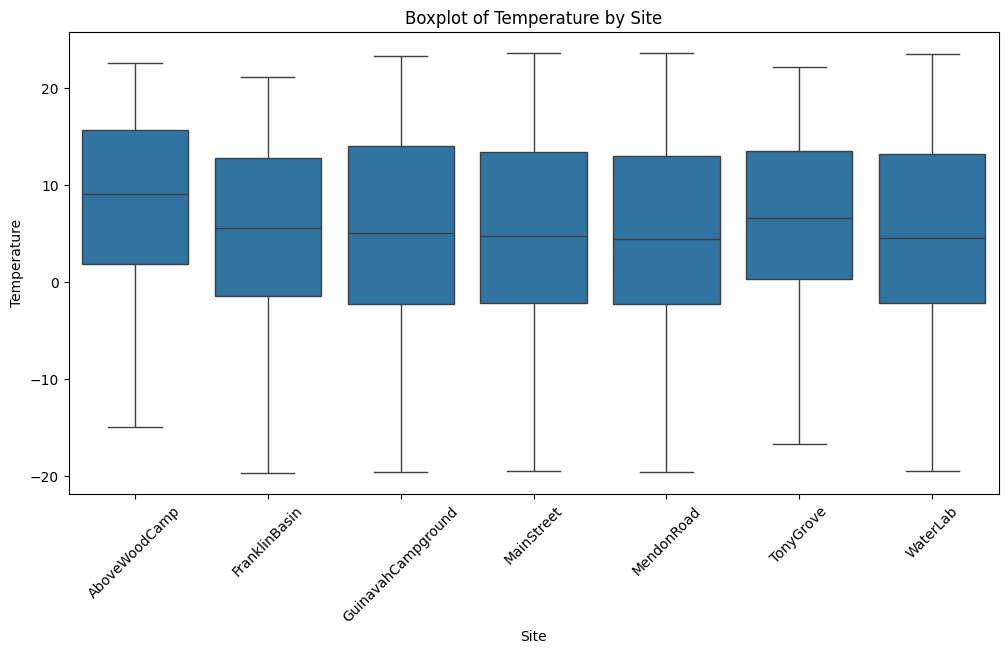

In [10]:
# Boxplot of temperature by site
plt.figure(figsize=(12, 6))
sns.boxplot(x='Site', y='T', data=data, showfliers=False)
plt.xticks(rotation=45)
plt.title("Boxplot of Temperature by Site")
plt.xlabel("Site")
plt.ylabel("Temperature")
plt.show()


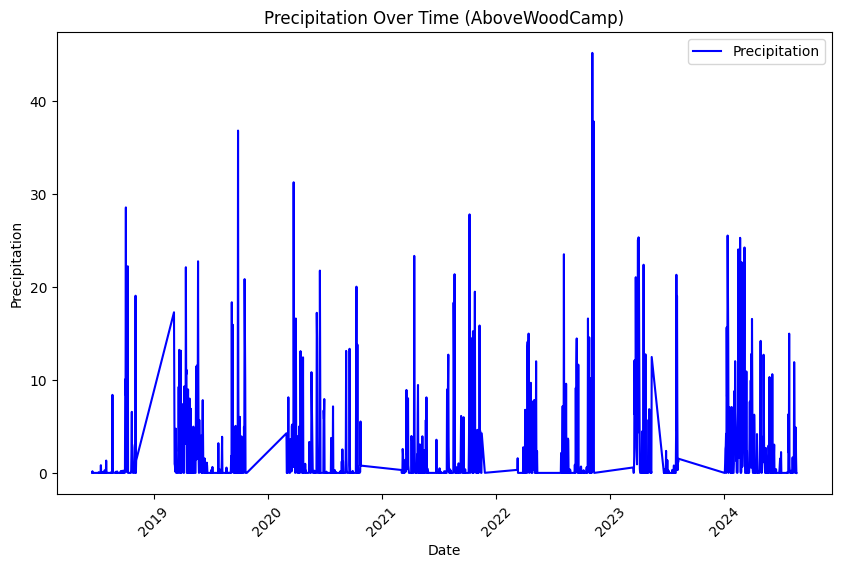

In [11]:
# Precipitation trends for "AboveWoodCamp"
above_wood_camp = data[data['Site'] == 'AboveWoodCamp']

plt.figure(figsize=(10, 6))
plt.plot(above_wood_camp['Day'], above_wood_camp['P'], label='Precipitation', color='blue')
plt.title("Precipitation Over Time (AboveWoodCamp)")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.xticks(rotation=45)
plt.legend()
plt.show()


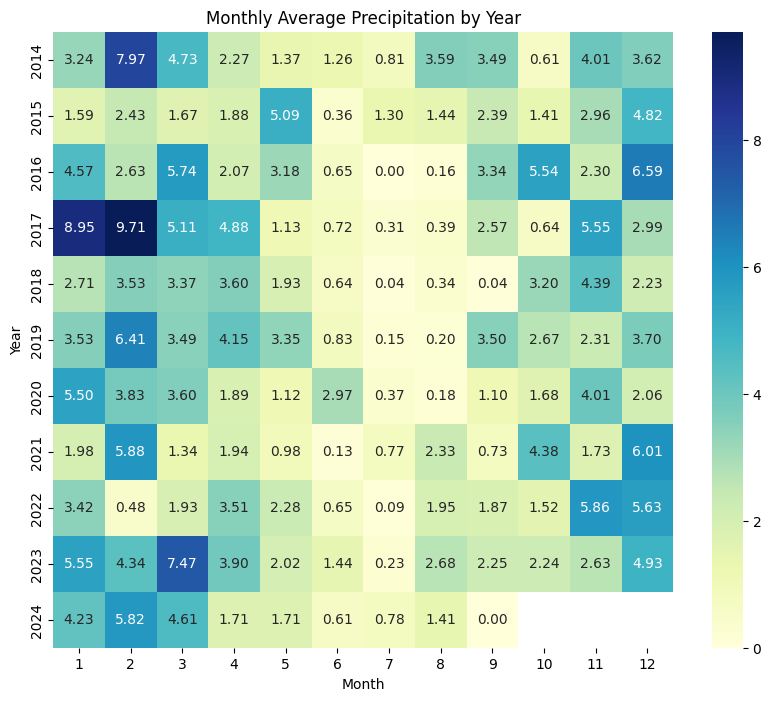

In [12]:
# Pivot table for heatmap
heatmap_data = data.pivot_table(values='P', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Monthly Average Precipitation by Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


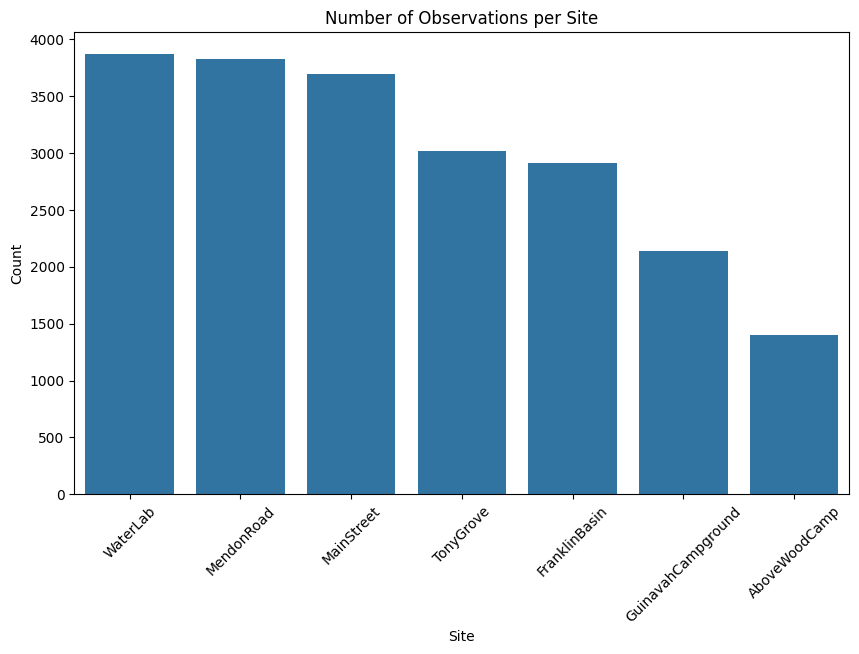

In [13]:
# Count of observations per site
site_counts = data['Site'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=site_counts.index, y=site_counts.values)
plt.xticks(rotation=45)
plt.title("Number of Observations per Site")
plt.xlabel("Site")
plt.ylabel("Count")
plt.show()


C:\Users\razin\AppData\Local\Temp\ipykernel_19192\3856656179.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Site", y="Discharge_cms", data=data, palette="Set2")


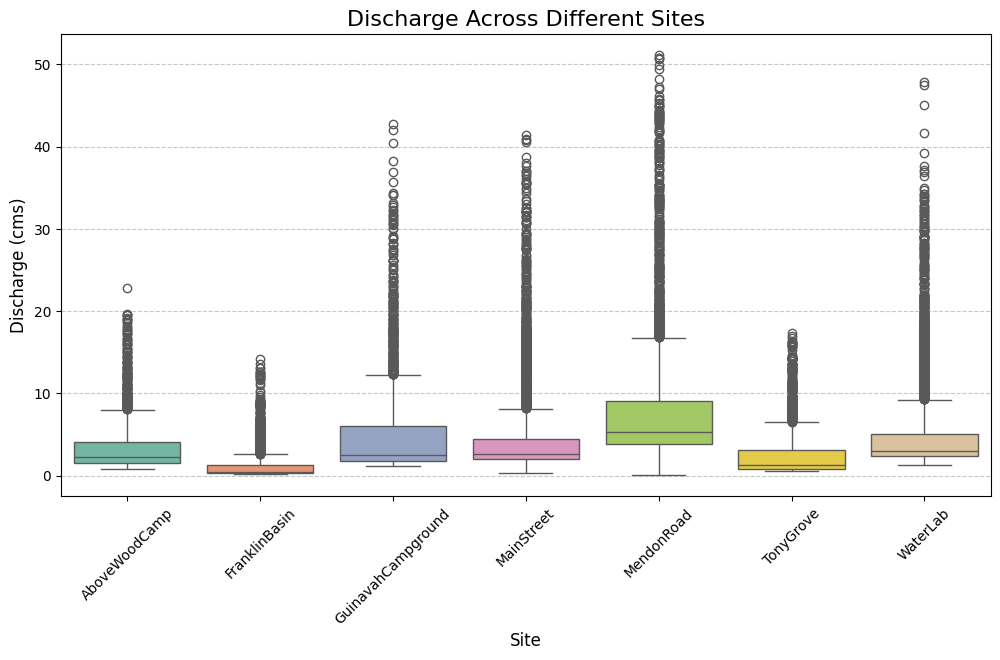

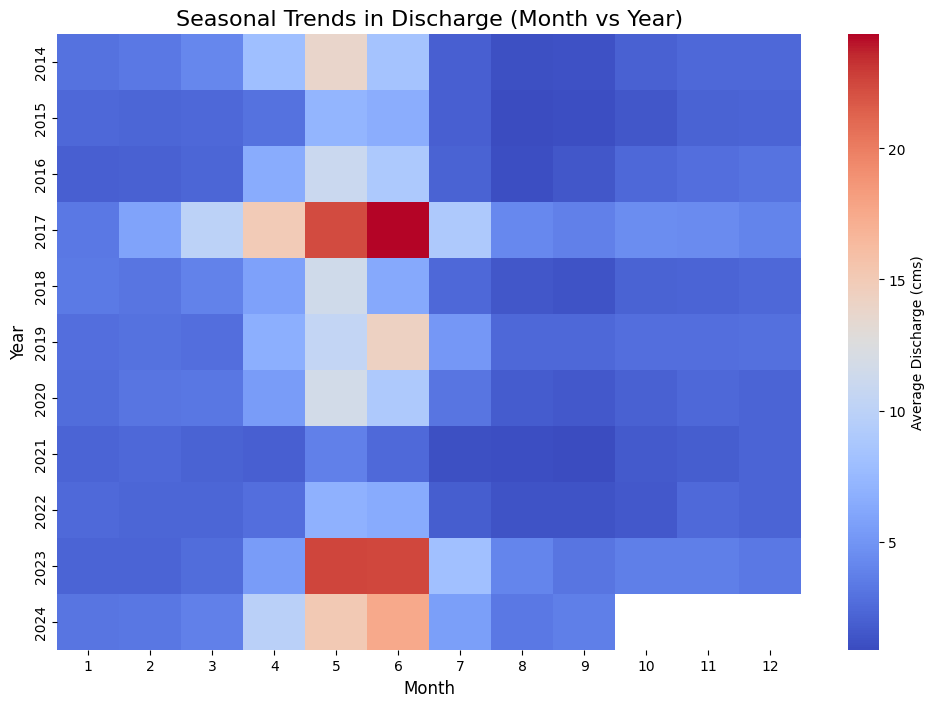

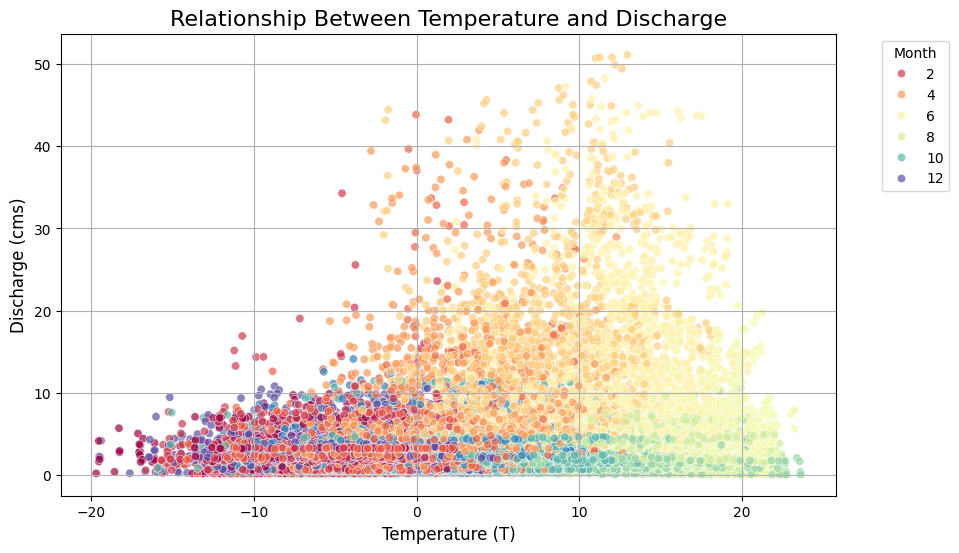

In [14]:
import numpy as np
import seaborn as sns

# 2. Distribution of Discharge Across Sites
if "Site" in data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Site", y="Discharge_cms", data=data, palette="Set2")
    plt.title("Discharge Across Different Sites", fontsize=16)
    plt.xlabel("Site", fontsize=12)
    plt.ylabel("Discharge (cms)", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# 3. Heatmap of Seasonal Trends (Month vs. Year for Discharge)
if "Month" in data.columns and "Year" in data.columns:
    seasonal_trend = data.groupby(["Year", "Month"])["Discharge_cms"].mean().unstack()

    plt.figure(figsize=(12, 8))
    sns.heatmap(seasonal_trend, cmap="coolwarm", annot=False, cbar_kws={'label': 'Average Discharge (cms)'})
    plt.title("Seasonal Trends in Discharge (Month vs Year)", fontsize=16)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Year", fontsize=12)
    plt.show()

# 4. Relationship Between Temperature and Discharge
plt.figure(figsize=(10, 6))
sns.scatterplot(x="T", y="Discharge_cms", data=data, hue="Month", palette="Spectral", alpha=0.7)
plt.title("Relationship Between Temperature and Discharge", fontsize=16)
plt.xlabel("Temperature (T)", fontsize=12)
plt.ylabel("Discharge (cms)", fontsize=12)
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop irrelevant columns
data = data.drop(columns=["Day"])

# One-hot encode the 'Site' feature
data = pd.get_dummies(data, columns=["Site"], drop_first=True)

# Define features (X) and target (y)
X = data.drop(columns=["Discharge_cms"])
y = data["Discharge_cms"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Cross-validation scores
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_rmse = np.sqrt(-cv_scores)

# Fit the model on training data and predict on test data
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Evaluate the model
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output results
{
    "Cross-validation RMSE (mean)": cv_rmse.mean(),
    "Cross-validation RMSE (std)": cv_rmse.std(),
    "Test RMSE": test_rmse
}


{'Cross-validation RMSE (mean)': 5.3662553356276375,
 'Cross-validation RMSE (std)': 0.116878863062109,
 'Test RMSE': 5.532488987286981}

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Remove the 'Site' feature for KNN
X_knn = data.drop(columns=["Discharge_cms"] + [col for col in data.columns if "Site_" in col])

# Scale the features
scaler = StandardScaler()
X_knn_scaled = scaler.fit_transform(X_knn)

# Train-test split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn = KNeighborsRegressor()

# Define a parameter grid for GridSearchCV
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search_knn.fit(X_train_knn, y_train_knn)

# Best model and predictions
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_knn)

# Evaluate the model
test_rmse_knn = np.sqrt(mean_squared_error(y_test_knn, y_pred_knn))

# Print results
print("Best Parameters:", grid_search_knn.best_params_)
print("Test RMSE:", test_rmse_knn)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Test RMSE: 2.452121917290588


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data (use the encoded dataset from earlier)
X_rf = data.drop(columns=["Discharge_cms"])
y_rf = data["Discharge_cms"]

# Train-test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define a parameter grid for GridSearchCV
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search_rf.fit(X_train_rf, y_train_rf)

# Best model and predictions
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_rf)

# Evaluate the model
test_rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))

# Print results
print("Best Parameters:", grid_search_rf.best_params_)
print("Test RMSE:", test_rmse_rf)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test RMSE: 1.7441238628080922


In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data (use the encoded dataset from earlier)
X_xgb = data.drop(columns=["Discharge_cms"])
y_xgb = data["Discharge_cms"]

# Train-test split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Define a parameter grid for GridSearchCV
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search_xgb.fit(X_train_xgb, y_train_xgb)

# Best model and predictions
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_xgb)

# Evaluate the model
test_rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))

# Print results
print("Best Parameters:", grid_search_xgb.best_params_)
print("Test RMSE:", test_rmse_xgb)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Test RMSE: 1.6539466561686653


In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data
X_svr = data.drop(columns=["Discharge_cms"])
y_svr = data["Discharge_cms"]

# Scale the features
scaler = StandardScaler()
X_svr_scaled = scaler.fit_transform(X_svr)

# Train-test split
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr_scaled, y_svr, test_size=0.2, random_state=42)

# Initialize the SVR model
svr = SVR()

# Define a parameter grid for GridSearchCV
param_grid_svr = {
    "kernel": ["linear", "poly", "rbf"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search_svr.fit(X_train_svr, y_train_svr)

# Best model and predictions
best_svr = grid_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test_svr)

# Evaluate the model
test_rmse_svr = np.sqrt(mean_squared_error(y_test_svr, y_pred_svr))

# Print results
print("Best Parameters:", grid_search_svr.best_params_)
print("Test RMSE:", test_rmse_svr)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test RMSE: 4.549449616644759


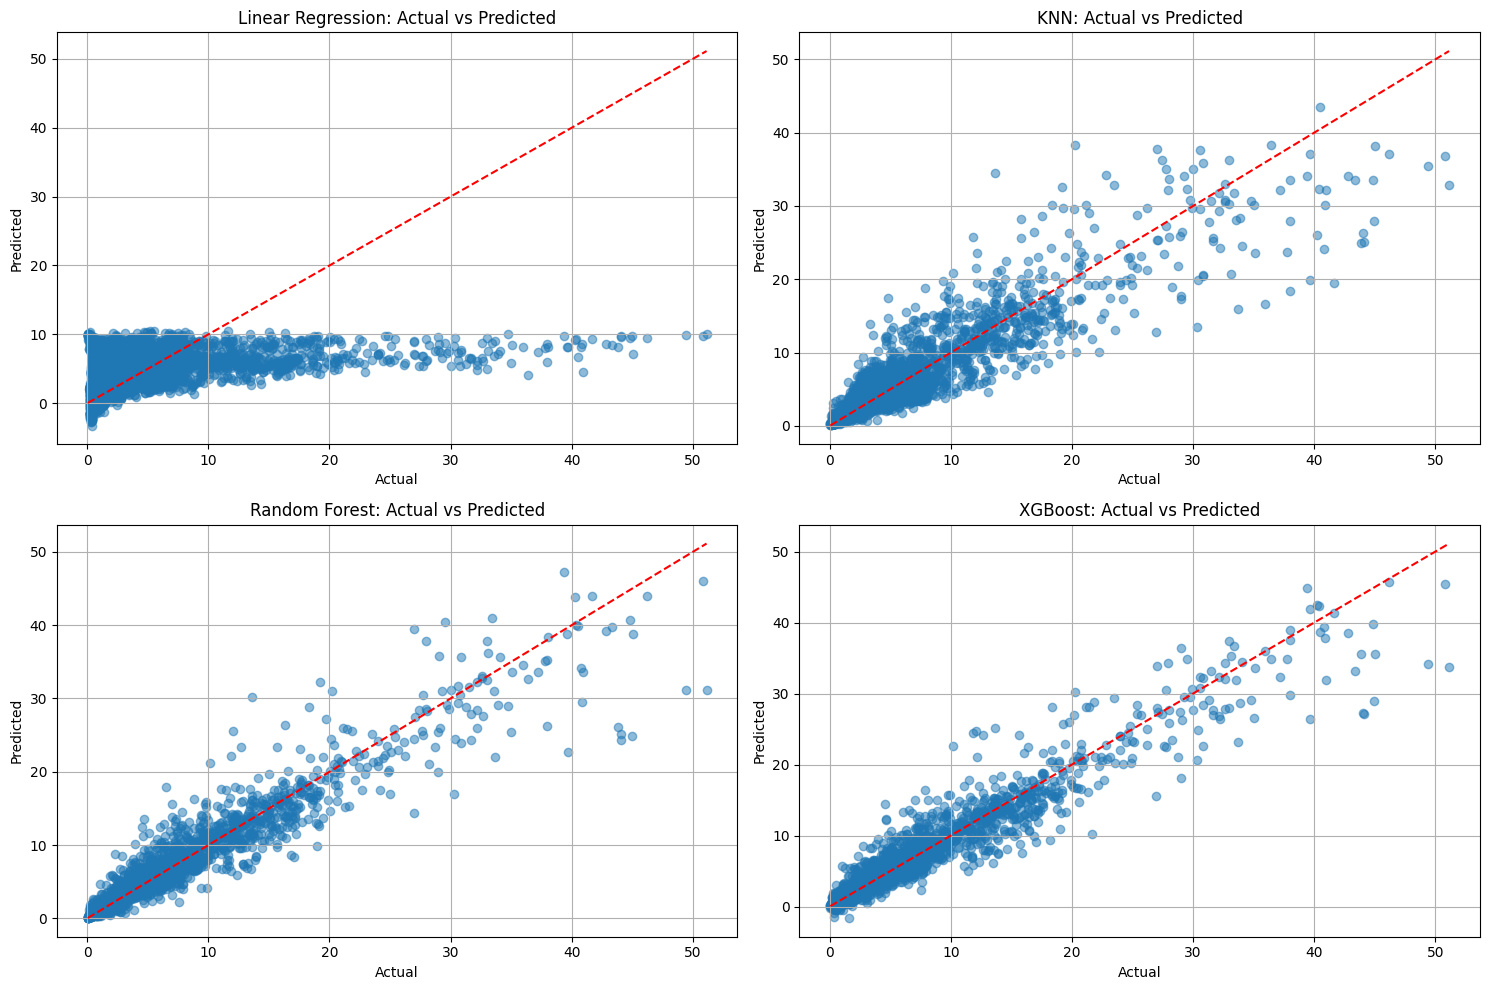

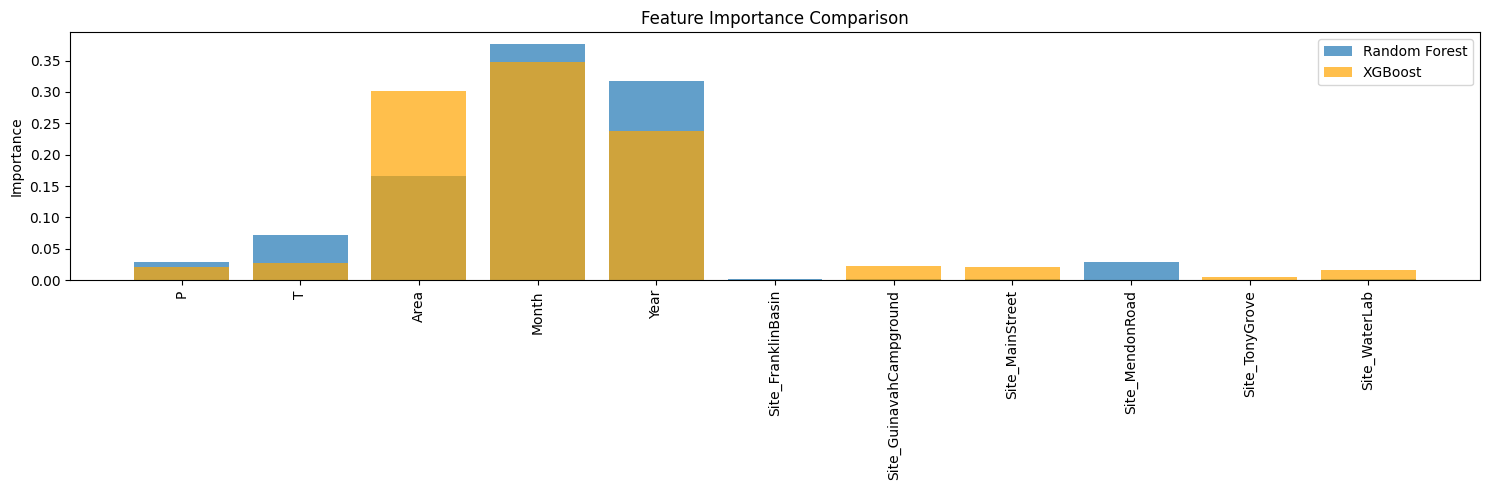

In [20]:
import matplotlib.pyplot as plt

# Prepare data for visualization: Replace the placeholders with your actual variables
models = {
    "Linear Regression": (y_test, y_pred),
    "KNN": (y_test_knn, y_pred_knn),
    "Random Forest": (y_test_rf, y_pred_rf),
    "XGBoost": (y_test_xgb, y_pred_xgb),
}

# Visualize Actual vs Predicted
plt.figure(figsize=(15, 10))
for i, (name, (actual, predicted)) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(actual, predicted, alpha=0.5)
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color="red", linestyle="--")
    plt.title(f"{name}: Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)

plt.tight_layout()
plt.show()

# Analyze feature importance for Random Forest and XGBoost
# Replace `best_rf` and `best_xgb` with your trained Random Forest and XGBoost models
rf_importances = best_rf.feature_importances_
xgb_importances = best_xgb.feature_importances_

# Plot feature importances
features = X_rf.columns  # Replace with your feature names

plt.figure(figsize=(15, 5))
plt.bar(features, rf_importances, alpha=0.7, label="Random Forest")
plt.bar(features, xgb_importances, alpha=0.7, label="XGBoost", color="orange")
plt.title("Feature Importance Comparison")
plt.xticks(rotation=90)
plt.ylabel("Importance")
plt.legend()
plt.tight_layout()
plt.show()


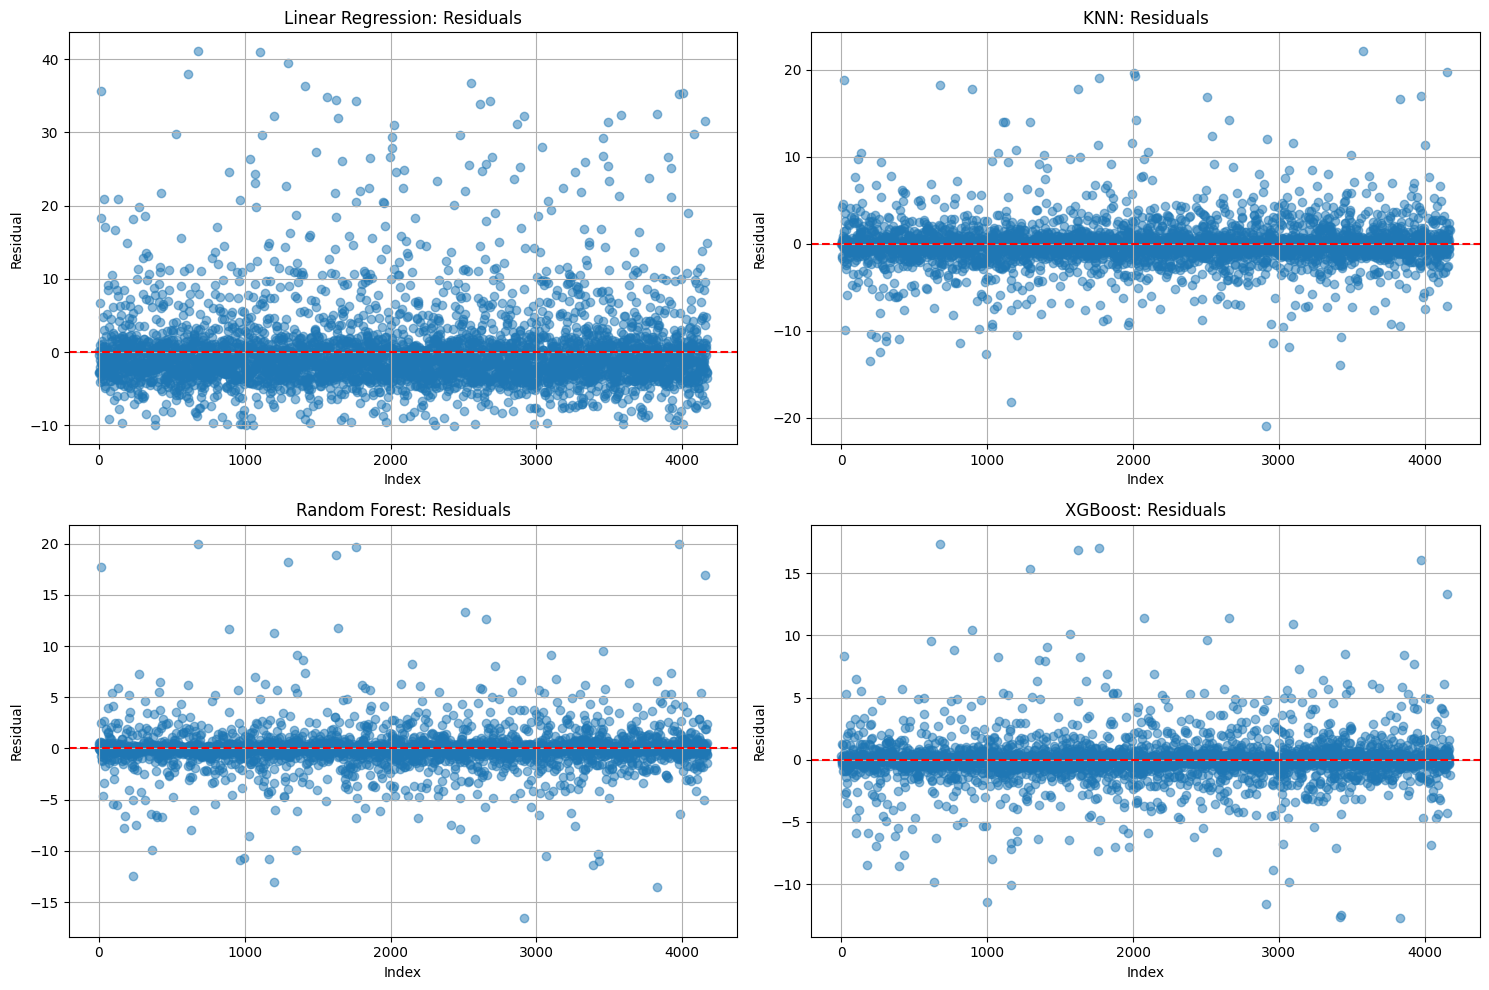

In [21]:
# Residuals (Actual - Predicted) for each model
residuals = {
    "Linear Regression": y_test - y_pred,
    "KNN": y_test_knn - y_pred_knn,
    "Random Forest": y_test_rf - y_pred_rf,
    "XGBoost": y_test_xgb - y_pred_xgb,
}

# Visualize Residuals
plt.figure(figsize=(15, 10))
for i, (name, res) in enumerate(residuals.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(range(len(res)), res, alpha=0.5)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.title(f"{name}: Residuals")
    plt.xlabel("Index")
    plt.ylabel("Residual")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate all models
metrics = {}
for model_name, (y_actual, y_predicted) in models.items():
    mae = mean_absolute_error(y_actual, y_predicted)
    r2 = r2_score(y_actual, y_predicted)
    metrics[model_name] = {"RMSE": np.sqrt(mean_squared_error(y_actual, y_predicted)), "MAE": mae, "R2": r2}

# Display results
import pandas as pd
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                       RMSE       MAE        R2
Linear Regression  5.532489  3.376743  0.170780
KNN                2.452122  1.313070  0.837103
Random Forest      1.744124  0.747577  0.917589
XGBoost            1.653947  0.790102  0.925891


In [23]:
import plotly.graph_objects as go
import pandas as pd

# Prepare data: Replace these placeholders with your actual data
actual = y_test.reset_index(drop=True)  # Actual values
predicted_linear = pd.Series(y_pred).reset_index(drop=True)  # Linear Regression predictions
predicted_knn = pd.Series(y_pred_knn).reset_index(drop=True)  # KNN predictions
predicted_rf = pd.Series(y_pred_rf).reset_index(drop=True)  # Random Forest predictions
predicted_xgb = pd.Series(y_pred_xgb).reset_index(drop=True)  # XGBoost predictions

# Create an interactive plot
fig = go.Figure()

# Add traces for actual vs predicted data
fig.add_trace(go.Scatter(y=actual, mode='lines', name='Actual Data', line=dict(color='black')))
fig.add_trace(go.Scatter(y=predicted_linear, mode='lines', name='Linear Regression Predictions', line=dict(dash='dot', color='#fe4a49')))
fig.add_trace(go.Scatter(y=predicted_knn, mode='lines', name='KNN Predictions', line=dict(dash='dot', color='#2ab7ca')))
fig.add_trace(go.Scatter(y=predicted_rf, mode='lines', name='Random Forest Predictions', line=dict(dash='dot', color='#fed766')))
fig.add_trace(go.Scatter(y=predicted_xgb, mode='lines', name='XGBoost Predictions', line=dict(dash='dot', color='#e6e6ea')))

# Customize layout
fig.update_layout(
    title="Comparison of Actual Data vs Predicted Data",
    xaxis_title="Index",
    yaxis_title="Value",
    legend_title="Legend",
    template="plotly_white"
)

# Show interactive plot
fig.show()


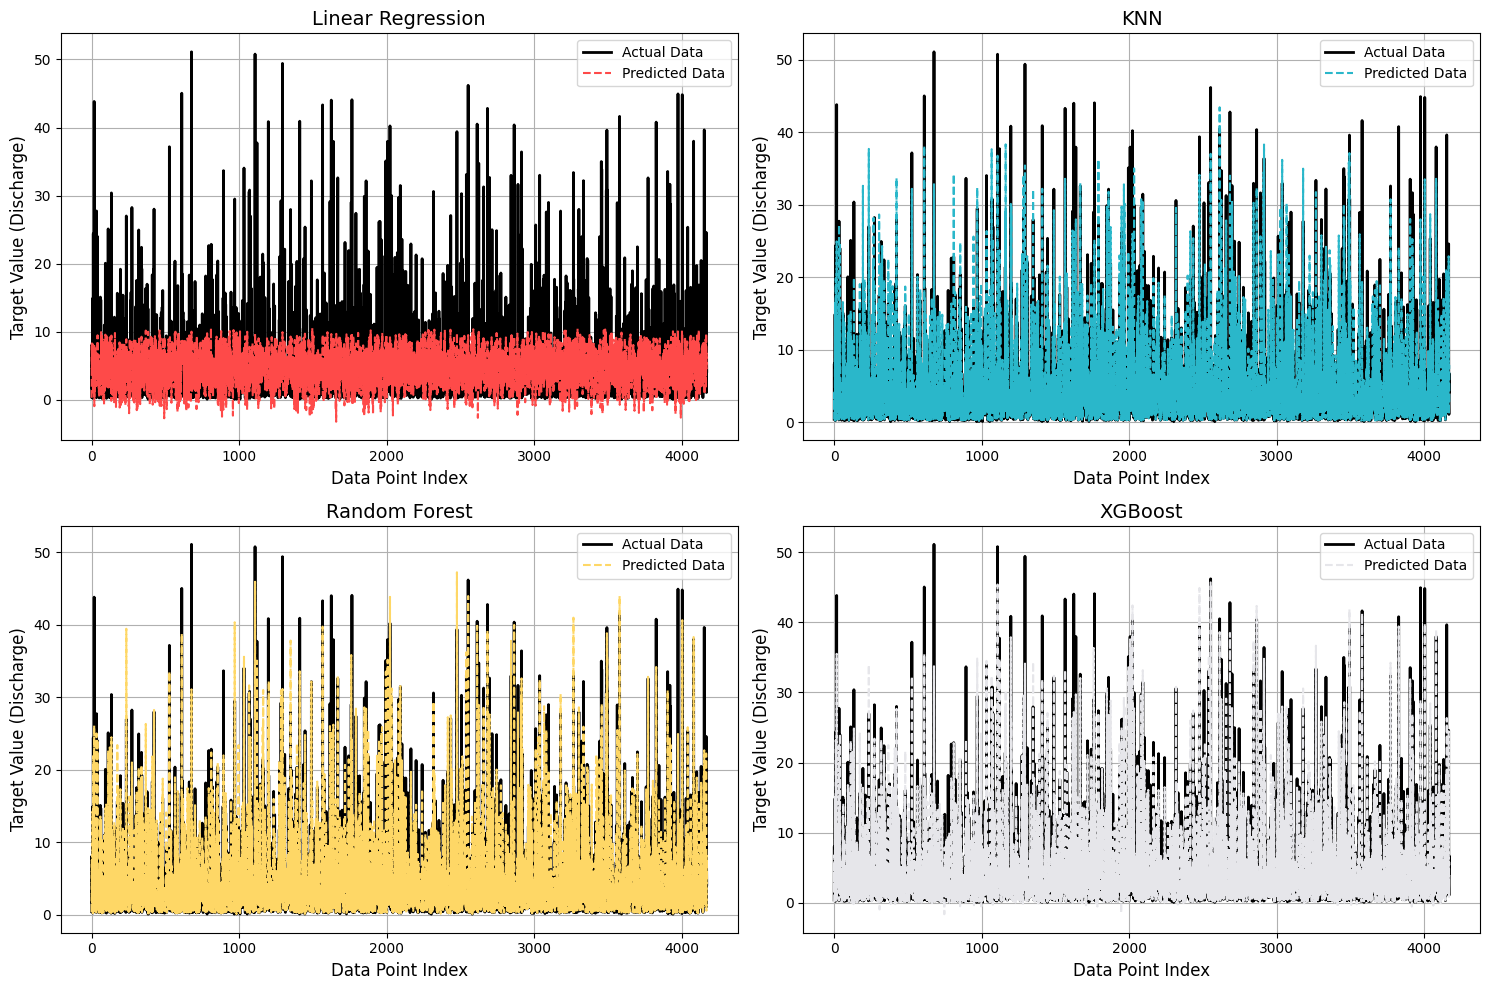

In [24]:
import matplotlib.pyplot as plt

# Prepare data (replace placeholders with actual values)
index = range(len(y_test))  # X-axis: Data point index
actual = y_test.reset_index(drop=True)  # Actual data
predicted_linear = pd.Series(y_pred).reset_index(drop=True)  # Linear Regression predictions
predicted_knn = pd.Series(y_pred_knn).reset_index(drop=True)  # KNN predictions
predicted_rf = pd.Series(y_pred_rf).reset_index(drop=True)  # Random Forest predictions
predicted_xgb = pd.Series(y_pred_xgb).reset_index(drop=True)  # XGBoost predictions

# Plot actual vs predicted for each model
plt.figure(figsize=(15, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.plot(index, actual, label="Actual Data", color="black", linewidth=2)
plt.plot(index, predicted_linear, label="Predicted Data", color="#fe4a49", linestyle="--")
plt.title("Linear Regression", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Target Value (Discharge)", fontsize=12)
plt.legend()
plt.grid(True)

# KNN
plt.subplot(2, 2, 2)
plt.plot(index, actual, label="Actual Data", color="black", linewidth=2)
plt.plot(index, predicted_knn, label="Predicted Data", color="#2ab7ca", linestyle="--")
plt.title("KNN", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Target Value (Discharge)", fontsize=12)
plt.legend()
plt.grid(True)

# Random Forest
plt.subplot(2, 2, 3)
plt.plot(index, actual, label="Actual Data", color="black", linewidth=2)
plt.plot(index, predicted_rf, label="Predicted Data", color="#fed766", linestyle="--")
plt.title("Random Forest", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Target Value (Discharge)", fontsize=12)
plt.legend()
plt.grid(True)

# XGBoost
plt.subplot(2, 2, 4)
plt.plot(index, actual, label="Actual Data", color="black", linewidth=2)
plt.plot(index, predicted_xgb, label="Predicted Data", color="#e6e6ea", linestyle="--")
plt.title("XGBoost", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Target Value (Discharge)", fontsize=12)
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


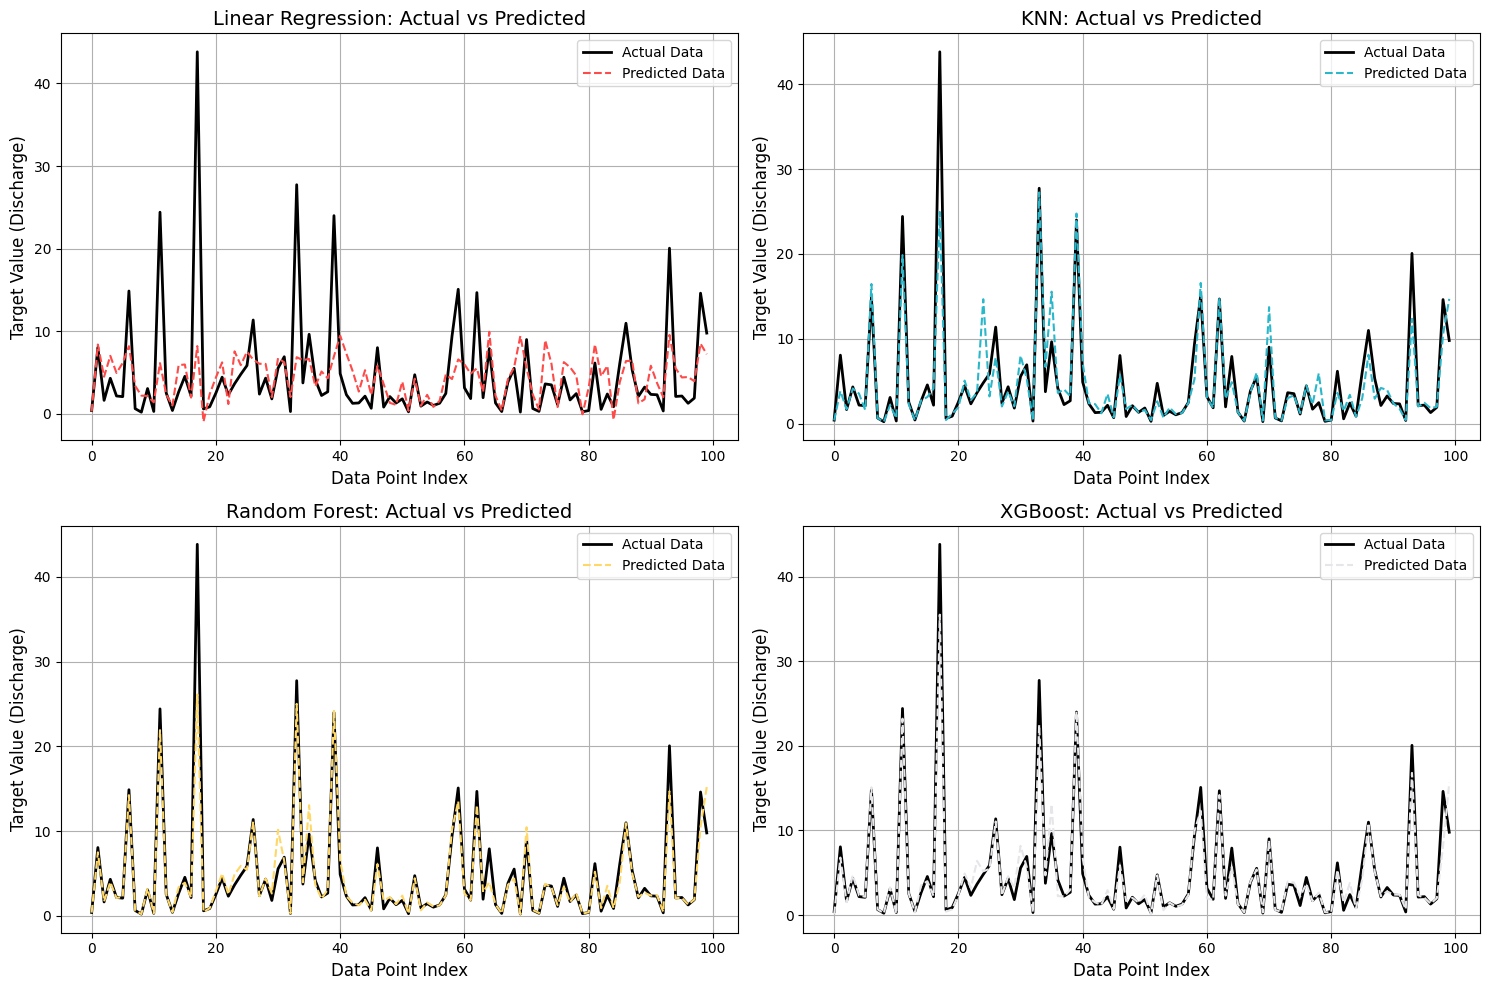

In [25]:
import matplotlib.pyplot as plt

# Define a smaller range for visualization (first 100 data points, for example)
zoom_index = range(100)
actual_zoom = actual[:100]
predicted_linear_zoom = predicted_linear[:100]
predicted_knn_zoom = predicted_knn[:100]
predicted_rf_zoom = predicted_rf[:100]
predicted_xgb_zoom = predicted_xgb[:100]

# Plot actual vs predicted for each model
plt.figure(figsize=(15, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.plot(zoom_index, actual_zoom, label="Actual Data", color="black", linewidth=2)
plt.plot(zoom_index, predicted_linear_zoom, label="Predicted Data", color="#fe4a49", linestyle="--")
plt.title("Linear Regression: Actual vs Predicted", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Target Value (Discharge)", fontsize=12)
plt.legend()
plt.grid(True)

# KNN
plt.subplot(2, 2, 2)
plt.plot(zoom_index, actual_zoom, label="Actual Data", color="black", linewidth=2)
plt.plot(zoom_index, predicted_knn_zoom, label="Predicted Data", color="#2ab7ca", linestyle="--")
plt.title("KNN: Actual vs Predicted", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Target Value (Discharge)", fontsize=12)
plt.legend()
plt.grid(True)

# Random Forest
plt.subplot(2, 2, 3)
plt.plot(zoom_index, actual_zoom, label="Actual Data", color="black", linewidth=2)
plt.plot(zoom_index, predicted_rf_zoom, label="Predicted Data", color="#fed766", linestyle="--")
plt.title("Random Forest: Actual vs Predicted", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Target Value (Discharge)", fontsize=12)
plt.legend()
plt.grid(True)

# XGBoost
plt.subplot(2, 2, 4)
plt.plot(zoom_index, actual_zoom, label="Actual Data", color="black", linewidth=2)
plt.plot(zoom_index, predicted_xgb_zoom, label="Predicted Data", color="#e6e6ea", linestyle="--")
plt.title("XGBoost: Actual vs Predicted", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Target Value (Discharge)", fontsize=12)
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


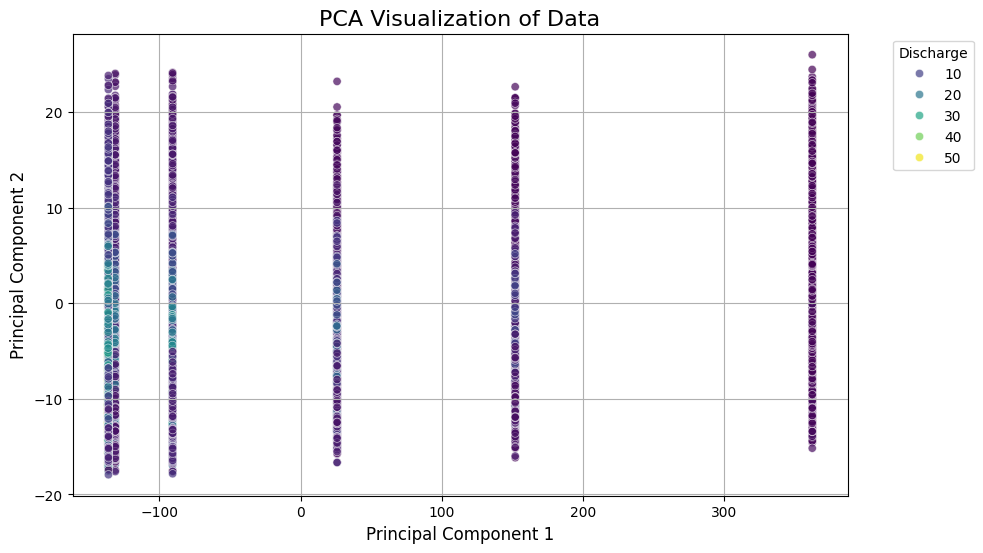

In [26]:
from sklearn.decomposition import PCA

# 1. PCA for Dimensionality Reduction and Visualization
# Select numeric columns and scale data
numeric_data = data.select_dtypes(include=["number"]).dropna()
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(numeric_data)

# Add PCA results to the dataset
data["PCA_1"] = pca_result[:, 0]
data["PCA_2"] = pca_result[:, 1]

# Scatterplot of PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA_1", y="PCA_2", hue="Discharge_cms", data=data, palette="viridis", alpha=0.7)
plt.title("PCA Visualization of Data", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Discharge", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

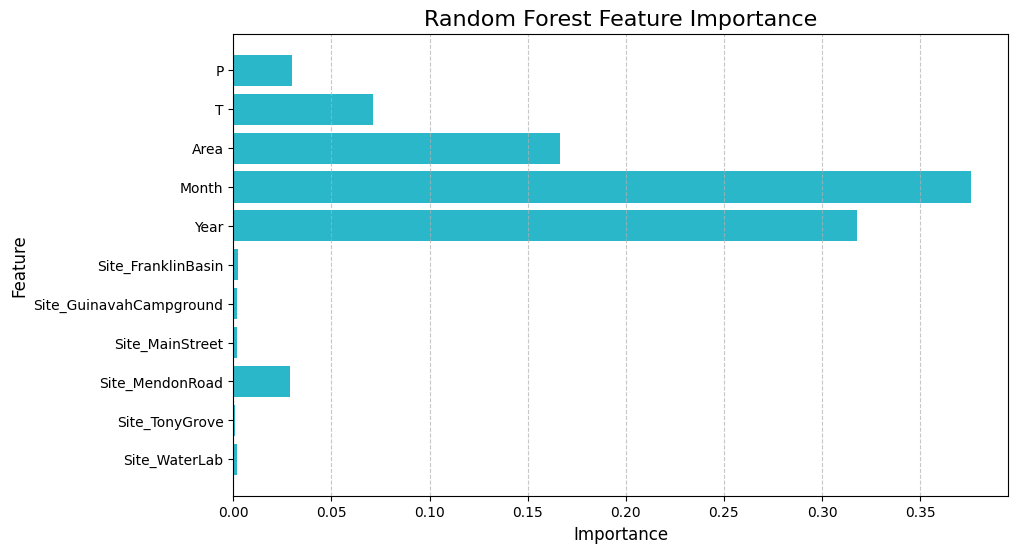

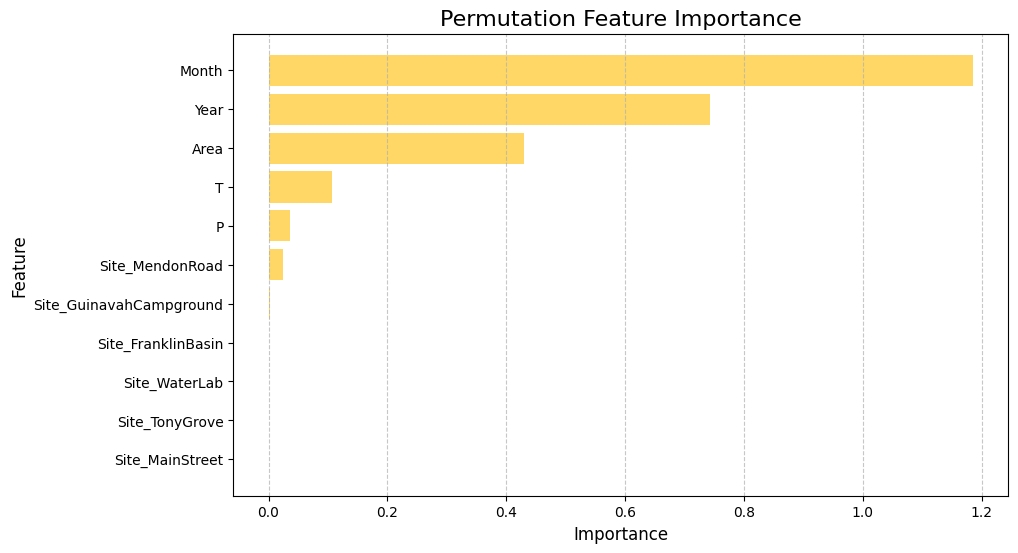

In [27]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Built-in Random Forest Feature Importance
rf_importances = best_rf.feature_importances_
features = X_xgb.columns

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, rf_importances, color="#2ab7ca")
plt.title("Random Forest Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Permutation Feature Importance
perm_importance = permutation_importance(best_rf, X_test_xgb, y_test_xgb, n_repeats=10, random_state=42)

# Convert to DataFrame for easier visualization
perm_df = pd.DataFrame({
    "Feature": features,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot Permutation Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(perm_df["Feature"], perm_df["Importance"], color="#fed766")
plt.title("Permutation Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()
